In [15]:
from weight_solver import *
from laplacian import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

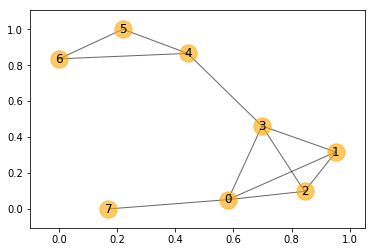

In [16]:
#G = nx.complete_graph(10)
G = GenDumbbellGraph(4,3)
E = IncidenceMatrix(G)

z = np.zeros(10)
E = np.vstack((E,z))
e = np.zeros(8)
e[0] = 1
e[-1] = -1
E = np.vstack((E.T, e)).T

G = GraphFromIncidenceMatrix(E)
pos = nx.fruchterman_reingold_layout(G)
Draw(G, pos = pos)
E = IncidenceMatrix(G)
F = E.copy()

In [17]:
L = E @ E.T
U,s,Vt = np.linalg.svd(L)
#s = np.ones_like(s)
s[-1] = 0
s[-2] = 0
s[-3] = 0 
print(s)
L_hat = U @ np.diag(s) @ Vt
E_hat = laplacian_squareroot(L_hat)

[ 5.396  4.832  4.     3.356  3.     0.     0.     0.   ]


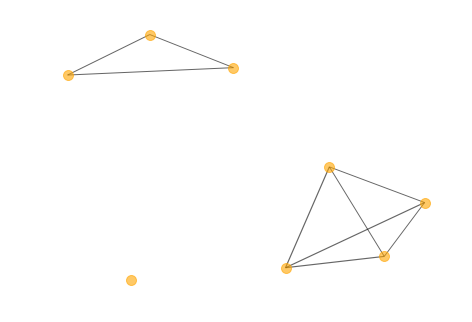

In [18]:
F, w = iterative_column_removal(E_hat, F, 9)
H = GraphFromIncidenceMatrix(F, w)
weights = [H[u][v]['weight'] for u,v in H.edges()]
nx.draw(H, node_color='orange', alpha = 0.6, node_size=100, edges = H.edges(), pos = pos, width = weights)

In [14]:
L_h = F @ F.T
U, s, Vt = np.linalg.svd(L_h)
s

array([  5.262e+00,   4.000e+00,   4.000e+00,   3.340e+00,   3.000e+00,
         3.983e-01,   1.608e-16,   0.000e+00])